In [4]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("melting-point-data/train_newFeature.csv")

corr = train.corr(numeric_only=True)["Tm"].sort_values(ascending=False)

train['Group 360'].sum()



np.int64(0)

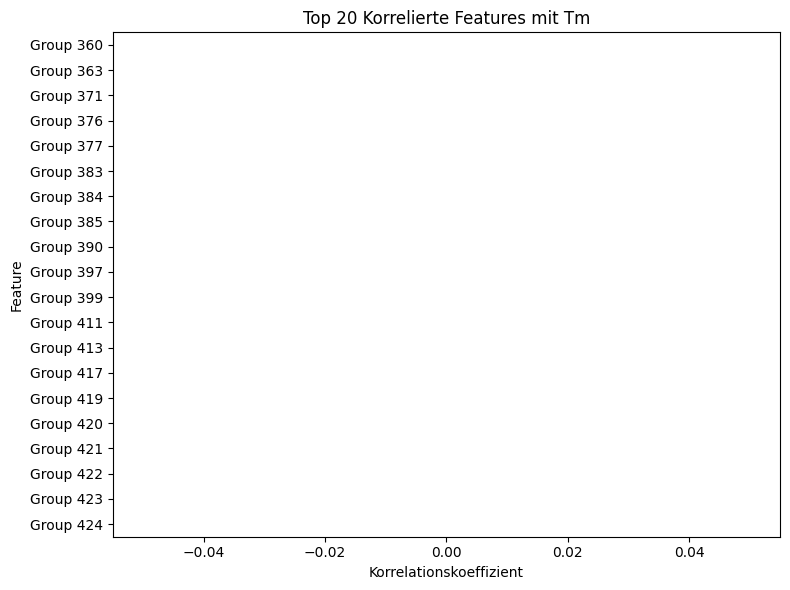

Group 360   NaN
Group 363   NaN
Group 371   NaN
Group 376   NaN
Group 377   NaN
Group 383   NaN
Group 384   NaN
Group 385   NaN
Group 390   NaN
Group 397   NaN
Group 399   NaN
Group 411   NaN
Group 413   NaN
Group 417   NaN
Group 419   NaN
Group 420   NaN
Group 421   NaN
Group 422   NaN
Group 423   NaN
Group 424   NaN
Name: Tm, dtype: float64

In [5]:
import matplotlib.pyplot as plt

top_n = 20  # z. B. Top 20 Features
corr_top = corr.tail(top_n)

plt.figure(figsize=(8, 6))
corr_top.plot(kind='barh', color='royalblue')
plt.gca().invert_yaxis()  # höchste Korrelation oben
plt.title(f"Top {top_n} Korrelierte Features mit Tm")
plt.xlabel("Korrelationskoeffizient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

corr.tail(20)




(2662, 429)

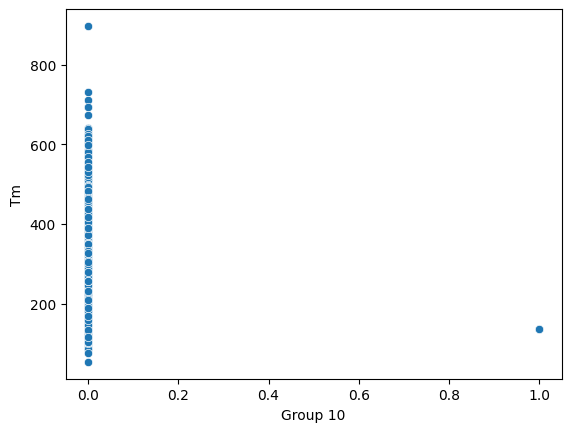

In [6]:
import seaborn as sns

sns.scatterplot(x=train["Group 10"], y=train["Tm"])

train.shape


In [7]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np

In [8]:
# correlation with target
corr = train.corr(numeric_only=True)['Tm'].abs().sort_values(ascending=False)

# keep only features with correlation > threshold
selected_features = corr[corr > 0.05].index.tolist()  # adjust threshold
X_reduced = train[selected_features]

train.shape

(2662, 429)

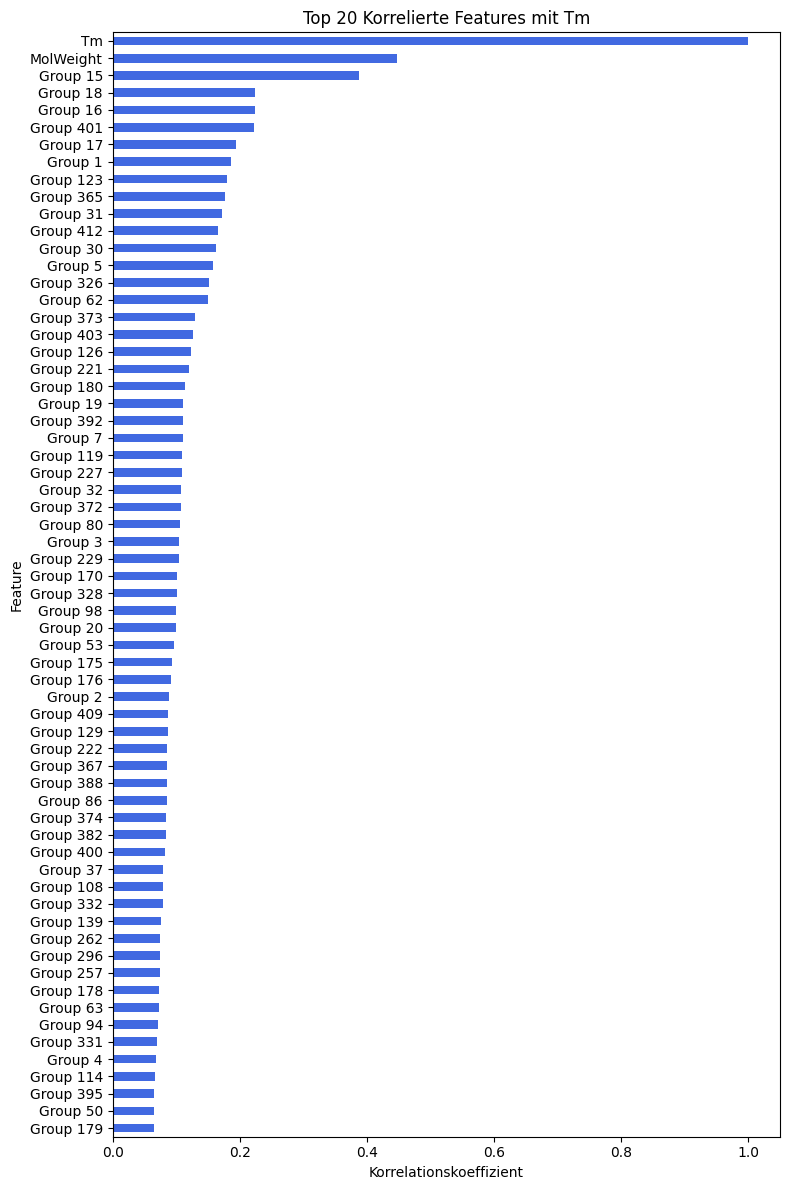

In [9]:
import matplotlib.pyplot as plt

top_n = 20  # z. B. Top 20 Features
corr_top = corr.head(64)

plt.figure(figsize=(8, 12))
corr_top.plot(kind='barh', color='royalblue')
plt.gca().invert_yaxis()  # höchste Korrelation oben
plt.title(f"Top {top_n} Korrelierte Features mit Tm")
plt.xlabel("Korrelationskoeffizient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [10]:
y_train = np.array(X_reduced['Tm']).reshape(-1,1)
y_train.shape

X_reduced.columns

Index(['Tm', 'MolWeight', 'Group 15', 'Group 18', 'Group 16', 'Group 401',
       'Group 17', 'Group 1', 'Group 123', 'Group 365', 'Group 31',
       'Group 412', 'Group 30', 'Group 5', 'Group 326', 'Group 62',
       'Group 373', 'Group 403', 'Group 126', 'Group 221', 'Group 180',
       'Group 19', 'Group 392', 'Group 7', 'Group 119', 'Group 227',
       'Group 32', 'Group 372', 'Group 80', 'Group 3', 'Group 229',
       'Group 170', 'Group 328', 'Group 98', 'Group 20', 'Group 53',
       'Group 175', 'Group 176', 'Group 2', 'Group 409', 'Group 129',
       'Group 222', 'Group 367', 'Group 388', 'Group 86', 'Group 374',
       'Group 382', 'Group 400', 'Group 37', 'Group 108', 'Group 332',
       'Group 139', 'Group 262', 'Group 296', 'Group 257', 'Group 178',
       'Group 63', 'Group 94', 'Group 331', 'Group 4', 'Group 114',
       'Group 395', 'Group 50', 'Group 179', 'Group 71', 'Group 379',
       'Group 394', 'Group 273', 'Group 228', 'Group 402', 'Group 261',
       'Group 49'

In [11]:
X_train = X_reduced.drop(['Tm'], axis=1)

X_train = np.array(X_train)

X_train

array([[162.032,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [217.271,  10.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [160.22 ,   4.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       ...,
       [156.228,   6.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [184.238,   7.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [200.079,   4.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]],
      shape=(2662, 93))

In [12]:
#scale data

x_scale = StandardScaler()
y_scale = StandardScaler()

X_train_scaled = x_scale.fit_transform(X_train)
y_train_scaled = y_scale.fit_transform(y_train)

In [13]:
#model

num_features = X_train_scaled.shape[1]

model = Sequential()
model.add(Dense(100, input_dim = num_features, activation = 'relu' ))
model.add(Dense(250, activation = 'relu' ))
model.add(Dense(50, activation = 'relu' ))

model.add(Dense(1, activation = 'linear' ))

num_features

/Users/enricofritz/Documents/Meltingpoint_rep/Melting_point_project/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93

In [14]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

history = model.fit(X_train_scaled,y_train_scaled, verbose = True, validation_split = 0.1, epochs = 1000)

Epoch 1/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6219 - mae: 0.5743 - val_loss: 0.3725 - val_mae: 0.4745
Epoch 2/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.4715 - mae: 0.4892 - val_loss: 0.3543 - val_mae: 0.4437
Epoch 3/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.4242 - mae: 0.4733 - val_loss: 0.3516 - val_mae: 0.4705
Epoch 4/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.3743 - mae: 0.4385 - val_loss: 0.3246 - val_mae: 0.4354
Epoch 5/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.3498 - mae: 0.4251 - val_loss: 0.3066 - val_mae: 0.4209
Epoch 6/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.3263 - mae: 0.4079 - val_loss: 0.3105 - val_mae: 0.4230
Epoch 7/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.3263 - mae: 0.4072 - val_loss: 0.3141 - val_mae: 0.4216
Epoch 8/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.3157 - mae: 0.4038 - val_loss: 0.2981 - val_mae: 0.4114
Epoch 9/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s

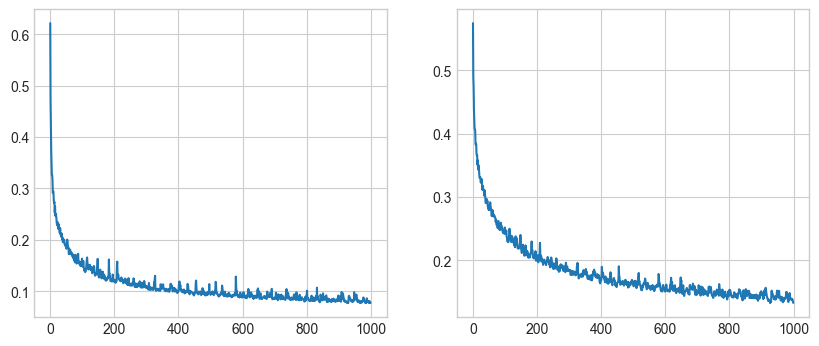

In [15]:
plt.style.use("seaborn-v0_8-whitegrid")


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))

ax1.plot(history.history['loss'])
# ax1.plot(history.history['val_loss'])


ax2.plot(history.history['mae'])
# ax2.plot(history.history['precision'])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


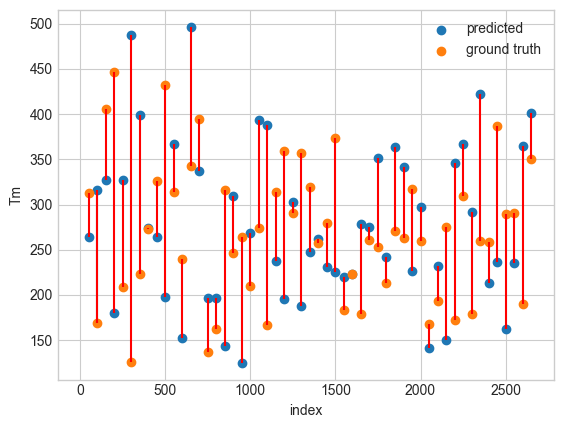

In [16]:

x_sample = []
x_axis = []
y_real  = []
k = 0
for i in X_train_scaled:
    k = k+1
    if k % 50 == 0:
        x_sample.append(i)
        x_axis.append(k)
        y_real.append(y_train[k])

x_sample = np.array(x_sample)
x_axis = np.array(x_axis)
y_real = np.array(y_real)



prediction = model.predict(x_sample)

y_predict_original = y_scale.inverse_transform(prediction)
x_original = x_scale.inverse_transform(X_train_scaled)



plt.scatter(x_axis, y_predict_original.flatten(), label = "predicted")
plt.scatter(x_axis, y_real.flatten(), label = "ground truth")
plt.legend()
plt.ylabel("Tm")
plt.xlabel("index")

plt.plot(x_axis[1], y_predict_original[1], y_real[1])

plt.vlines(x_axis[1], y_predict_original[1], y_real[1])

i = 0
while i < x_axis.shape[0]:
    plt.vlines(x_axis[i], y_predict_original[i], y_real[i], color="red")
    i = i +1






In [17]:
X_train_scaled

array([[ 0.05813892, -0.75401609, -0.23890204, ..., -0.05824419,
        -0.06604196, -0.06357017],
       [ 0.85469818,  2.47921658, -0.23890204, ..., -0.05824419,
        -0.06604196, -0.06357017],
       [ 0.03200946,  0.53927697, -0.23890204, ..., -0.05824419,
        -0.06604196, -0.06357017],
       ...,
       [-0.02555611,  1.18592351, -0.23890204, ..., -0.05824419,
        -0.06604196, -0.06357017],
       [ 0.37835462,  1.50924677, -0.23890204, ..., -0.05824419,
        -0.06604196, -0.06357017],
       [ 0.60678553,  0.53927697, -0.23890204, ..., -0.05824419,
        -0.06604196, -0.06357017]], shape=(2662, 93))

In [18]:
X_train_scaled[1,:]

array([ 0.85469818,  2.47921658, -0.23890204,  2.86285058,  6.60269198,
        9.1852142 , -0.75415365, -0.22714907,  5.34884305, -0.1826636 ,
        6.07276672, -0.24534816, -0.17916534, -0.25798664, -0.19314683,
       -0.07345399, -0.14572124, -0.13643836, -0.21130557, -0.16782688,
       -0.20431466, 17.41631164, -0.11392177, -0.11032874, -0.14126549,
       -0.07271182, -0.09774146, -0.16604974, -0.26991222, -0.09543967,
       -0.1222318 , -0.22803372, -0.06228075, -0.32321739, -0.21418446,
        6.95045632, -0.13426539, -0.42332534, -0.04337997, -0.13003438,
       -0.13003438, -0.09829464, -0.05668567, -0.07776158, -0.08337076,
       -0.05603846, -0.06441566, -0.15504116, -0.15158899, -0.08478679,
       -0.04337997, -0.04510778, -0.12073116, -0.04573128, -0.0752781 ,
       -0.10208808, -0.04337997, -0.10676224, -0.17496118, -0.06729266,
       -0.05824419, -0.13193908, -0.16129654, -0.08880378, -0.06729266,
       -0.03879292, -0.09037075, -0.17762677, -0.1255764 , -0.04